In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm
from datetime import date
from sklearn import metrics

In [134]:
ames = pd.read_csv('./data/train.csv')

In [135]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [136]:
ames.shape

(2051, 81)

In [137]:
ames.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## DEALING WITH MISSING DATA

In [179]:
def curb_appeal(df):
    '''
        returns the curb appeal score array of a dataframe.
    '''
    appeal = []
    for index in range(df.shape[0]):
        score = 0
        if (df['Pool Area'][index] != 0):
            score += 1
        if (df['Fence'][index] != 'NA') or (df['Fence'][index] != 'MnWw'):
            score += 1
        if (df['Garage Type'][index]  == 'CarPort'):
            score += 1
        if (df['Garage Type'][index]  != 'NA'):
            score += 1
        if (df['Paved Drive'][index] == 'Y'):
            score += 1
        if (df['Fireplaces'][index] != 0):
            score += 1
        if (df['TotRms AbvGrd'][index] > df['TotRms AbvGrd'].mean()):
            score += 1
        if (df['Central Air'][index] == 'Y'):
            score += 1
        if (df['Utilities'][index] == 'AllPub'):
            score += 1
        if (df['Condition 1'][index] == 'Norm' or df['Condition 2'][index] == 'Norm'):
            score += 1
        if (df['Functional'][index] == 'Typ'):
            score += 1
        if (df['Alley'][index] == 'Pave'):
            score += 1
        if (df['BsmtFin Type 1'][index] == 'GLQ' or df['BsmtFin Type 2'][index] == 'GLQ'):
            score += 1
        if (df['Misc Feature'][index] == 'TenC'):
            score += 1  
        if (df['Roof Style'][index] == 'Hip'):
            score += 1
        appeal.append(score)
    return appeal

In [211]:
df = pd.read_csv('./data/train.csv')
df.groupby('Heating')['SalePrice'].count().sort_values

df[df['Garage Yr Blt'] > 2020]
#plt.scatter(df['Garage Yr Blt'],df['SalePrice']);

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


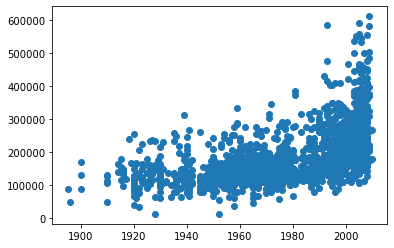

In [218]:
# creating a score for outdoors
df = pd.read_csv('./data/train.csv')
pens = []

#df['Garage Type'].fillna('NA',inplace=True)
#df['TotRms AbvGrd'].fillna(0)

for index in range(2051):
    score = 0
    if (df['MS Zoning'][index] == 'RM' or df['MS Zoning'][index] == 'RH'):
        score += 1
    if (df['Street'][index] == 'Grvl'):
        score += 1
    if (df['Alley'][index] == 'Grvl'):
        score += 1
    if (df['Land Contour'][index] == 'Bnk'):
        score += 1
    if (df['Utilities'][index] == 'NoSeWa' or df['Utilities'][index] == 'NoSewr'):
        score += 1
    if (df['Condition 1'][index] != 'Norm' or df['Condition 1'][index] != 'PosA' or df['Condition 1'][index] != 'PosN'):
        score += 1
    if (df['Condition 2'][index] != 'Norm' or df['Condition 2'][index] != 'PosA' or df['Condition 2'][index] != 'PosN'):
        score += 1
    if (df['Overall Cond'][index] < 5 or df['Overall Qual'][index] < 5):
        score += 1
    if (2021 - df['Year Built'][index] > 50):
        score += 1
    if (df['TotRms AbvGrd'][index] < df['TotRms AbvGrd'].mean() - df['TotRms AbvGrd'].std()):
        score += 1
    if (df['Functional'][index] != 'Typ'):
        score += 1
    if (df['BsmtFin Type 1'][index] == 'BLQ' or df['BsmtFin Type 1'][index] == 'LwQ'):
        score += 1
    if (df['BsmtFin Type 2'][index] == 'BLQ' or df['BsmtFin Type 2'][index] == 'LwQ'):
        score += 1
    
        
    pens.append(score)
df['Garage Yr Blt'] = df['Garage Yr Blt'].apply(lambda x: 2007 if x > 2020 else x)
plt.scatter(df['Garage Yr Blt'],df['SalePrice'])

In [180]:
def penalties(df):
    '''
        returns the penalties score as in things that would maybe make someone
        value a property less.
    '''
    pens = []
    for index in range(df.shape[0]):
        score = 0
        if (df['MS Zoning'][index] == 'RM' or df['MS Zoning'][index] == 'RH'):
            score += 1
        if (df['Street'][index] == 'Grvl'):
            score += 1
        if (df['Alley'][index] == 'Grvl'):
            score += 1
        if (df['Land Contour'][index] == 'Bnk'):
            score += 1
        if (df['Utilities'][index] == 'NoSeWa' or df['Utilities'][index] == 'NoSewr'):
            score += 1
        if (df['Condition 1'][index] != 'Norm' or df['Condition 1'][index] != 'PosA' or df['Condition 1'][index] != 'PosN'):
            score += 1
        if (df['Condition 2'][index] != 'Norm' or df['Condition 2'][index] != 'PosA' or df['Condition 2'][index] != 'PosN'):
            score += 1
        if (2021 - df['Year Built'][index] > 50):
            score += 1
        if (df['TotRms AbvGrd'][index] < df['TotRms AbvGrd'].mean() - df['TotRms AbvGrd'].std()):
            score += 1
        if (df['Functional'][index] != 'Typ'):
            score += 1
        if (df['BsmtFin Type 1'][index] == 'BLQ' or df['BsmtFin Type 1'][index] == 'LwQ')
            score += 1
        pens.append(score)
    return pens

In [225]:
def clean_dum_ames(df):
    '''
        cleans the data from both data frames, the main purpose is to not have to format the test data every time
    '''
    
    # This part deals with the NaN Categorical. To not losed any information, we will make them their
    # own category.
    dirty_cols = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu',
             'Garage Finish','Garage Qual','Garage Cond','Garage Type',
             'Bsmt Exposure','BsmtFin Type 2','BsmtFin Type 1','Bsmt Cond',
             'Bsmt Qual','Mas Vnr Type', 'MS SubClass', 'Street']
    
    for col in dirty_cols:
        df[col].fillna('NA',inplace=True)
    
    # since lot frontage doesn't have any zeros, I will assume that this lack of input is similar in error to
    # the categorical values. It is possible for a house to be zero lot line so we will replace nans with 0s.
    # we will use a similar strategy throughout the numeric values
    #
    # For the Garage Yr Blt I will set the value to zero for now, what I will ultimately drop this colum from my 
    # equation and turn it into a categorical data later
    #
    # Since data missing is 1% I think we can make the arguement that we will still have enough
    # of the picture to make a valid linear model. The purpose of this is to get as good a model as
    # possible, without going too far into the real of inexplicability. This 1% can potentially add too
    # much noise with too many variables to predict what may be going wrong
    df.fillna(0, inplace=True)
    
    # garage year built 2027? I am going to say it was a typo and correct to 2007
    df['Garage Yr Blt'] = df['Garage Yr Blt'].apply(lambda x: 2007 if x > 2020 else x)
    
    # curb appeal
    df['curb_appeal'] = curb_appeal(df)
    # penalties
    df['pens'] = penalties(df)
    
    # Quality Scaling
    cast_dict = {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        'NA' : 0
    }
    quals = [
        'Kitchen Qual', 'Exter Qual', 'Fireplace Qu', 
        'Bsmt Qual', 'Pool QC', 'Bsmt Cond', 'Garage Qual',
        'Garage Cond', 'Exter Cond'
    ]
    for qual in quals:
        df[qual] = df[qual].map(cast_dict) 
    
    # mapping the Ms SubClass
    df['MS SubClass'] = df['MS SubClass'].map({20:'One Story',30:'One Story',40:'One Story',45:'One Story',50:'One Story',
                        60:'Two Story',70:'Two Story',75:'Two Story',
                        80:'Split',85:'Split',
                        90:'Duplex',
                        120:'PUD',150:'PUD',160:'PUD',180:'PUD',
                        190:'Conversion'})
    
    ### ENGINEERING
    # this will help us see how old or new a house is
    df['house_age'] = df['Yr Sold'] - df['Year Built'] #no
    # total sq footage
    df['total_SF'] = df['1st Flr SF'] + df['2nd Flr SF'] #yes
    # overalls
    df['overalls'] = df['Overall Qual'] * df['Overall Cond'] #yes
    # has vnr
    df['has_vnr_area'] = df['Mas Vnr Area'].apply(lambda x: 'Yes' if x != 0 else 'No') # no
    
    # dummying
    cols_to_dummy = df.select_dtypes(include=['object','category']).columns
    
    return pd.get_dummies(df,drop_first=True,columns=cols_to_dummy)

In [226]:
# Saving data frames
training_df = clean_dum_ames(pd.read_csv('./data/train.csv'))
testing_df = clean_dum_ames(pd.read_csv('./data/test.csv'))
training_df.to_csv('./frames/training.csv')
testing_df.to_csv('./frames/testing.csv')

## EDA

In [11]:
data = pd.read_csv('./data/train.csv')
# creating a neighborhood score index. the higher the score the nicer the area
data.groupby('Sale Type')['SalePrice'].mean()

Sale Type
COD      133574.523810
CWD      186635.000000
Con      241807.500000
ConLD    129091.352941
ConLI    207992.857143
ConLw    124600.000000
New      279021.056250
Oth      127497.750000
WD       174912.251544
Name: SalePrice, dtype: float64

In [12]:
data.shape

(2051, 81)

In [ ]:
# creating a score for outdoors
data = pd.read_csv('./data/train.csv')
ca = []

data['Garage Type'].fillna('NA',inplace=True)
data['TotRms AbvGrd'].fillna(0)

for index in range(2051):
    score = 0
    if (data['Pool Area'][index] != 0):
        score += 1
    if (data['Fence'][index] != 'NA') or (data['Fence'][index] != 'MnWw'):
        score += 1
    if (data['Garage Type'][index]  == 'CarPort'):
        score += 1
    if (data['Garage Type'][index]  != 'NA'):
        score += 1
    if (data['Paved Drive'][index] == 'Y'):
        score += 1
    if (data['Fireplaces'][index] != 0):
        score += 1
    if (data['TotRms AbvGrd'][index] > data['TotRms AbvGrd'].mean()):
        score += 1
    if (data['Central Air'][index] == 'Y'):
        score += 1
    if (data['Bsmt Cond'][index] == 'Ex' or data['Bsmt Cond'][index] == 'Gd'):
        score += 1
    if (data['Exter Qual'][index] == 'Ex' or data['Exter Qual'][index] == 'Gd'):    
        score += 1
    if (data['Utilities'][index] == 'AllPub'):
        score += 1
    if (data['Condition 1'][index] == 'Norm' or data['Condition 2'][index] == 'Norm'):
        score += 1
    if (data['Kitchen Qual'][index] == 'Gd' or data['Kitchen Qual'][index] == 'Ex'):
        score += 1
    if (data['Overall Cond'][index] > 5):
        score += 1
    if (data['Functional'][index] == 'Typ'):
        score += 1
    if (data['Heating QC'][index] == 'Gd' or data['Heating QC'][index] == 'Ex'):
        score += 1
    if (data['Alley'][index] == 'Pave'):
        score += 1
    if (data['Bsmt Exposure'][index] == 'Gd' or data['Bsmt Exposure'][index] == 'Av'):
        score += 1
    if (data['BsmtFin Type 1'][index] == 'GLQ' or data['BsmtFin Type 2'][index] == 'GLQ'):
        score += 1
    if (data['Misc Feature'][index] == 'TenC'):
        score += 1
        
    ca.append(score/10)
    
data['curb_appeal'] = ca
plt.scatter(data['curb_appeal'],data['SalePrice']);

In [ ]:
plt.scatter(data['Year Remod/Add'],data['SalePrice'])

In [ ]:
data['SalePrice'].mean()

In [ ]:
data.corr()['curb_appeal'].sort_values(ascending=False).head(10)

In [ ]:
plt.scatter(data['Bsmt Unf SF'],data['SalePrice'])

In [ ]:
data = pd.read_csv('./data/train.csv')
data['Pool QC'].fillna('NA',inplace=True)
data['has_pool'] = data['Pool QC'].apply(lambda x: 0 if x == 'NA' else 1)
x = data.groupby('has_pool')['SalePrice'].mean()
plt.bar(x.keys(), x.values);

In [ ]:
data = pd.read_csv('./data/train.csv')
x = data.groupby('Condition 1')['SalePrice'].mean()
plt.bar(x.keys(), x.values);

In [ ]:
x = data.groupby('Exter Qual')['SalePrice'].mean()
plt.bar(x.keys(), x.values);

In [ ]:
# is how modern a house is effective?
plt.scatter(data['Year Built'],data['SalePrice'])

In [ ]:
data = pd.read_csv('./data/train.csv')
data.groupby('Functional')['SalePrice'].mean()

In [ ]:
#plt.scatter(data['total_SF'],data['SalePrice'])

In [ ]:
data = pd.read_csv('./data/train.csv')

data.fillna('NA').groupby('Bsmt Qual')['SalePrice'].mean()

In [ ]:
##
data = pd.read_csv('./data/train.csv')
data.groupby('Exterior 1st')['SalePrice'].mean()

## Baseline Kitchen Sink Model

In [35]:
# CLEAN THIS FOR SUBMISSION
ames = clean_dum_ames(ames)

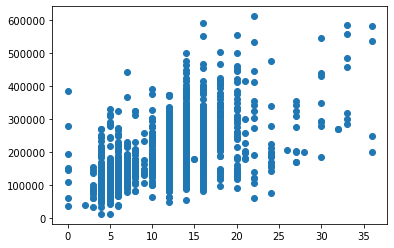

In [37]:
bbb = ames['Full Bath'] * ames['TotRms AbvGrd']
plt.scatter(bbb,ames['SalePrice'])

In [ ]:
#ames['qc_gar_area'].

In [ ]:
# Splitting and scaling our training and testing data
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
# BASELINE MODEL
model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train).mean())
print(model.score(Z_test,y_test)) # yay our model is terrible you are better off just guessing

In [ ]:
X_train.columns[9]

## Exploring Possible Relations

In [ ]:
features = [
    'Overall Qual', 'Year Built', '1st Flr SF',
]

# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=13,
                                                   test_size=.2)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')


In [ ]:
test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))
features = [
    'Overall Qual', 'Year Built', '1st Flr SF',
]

X = test_frame[features]
sc = StandardScaler()
Z_test = sc.fit_transform(X)

test_frame['SalePrice'] = model.predict(Z_test)

In [ ]:
sub = test_frame[['Id','SalePrice']]
sub.to_csv('first_sub.csv',index=False)

In [ ]:
# these predictors are all significant
x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
ols.summary()

In [ ]:
ames.corr()['Overall Qual'].sort_values(ascending=False)

In [ ]:
features = [
    'Overall Qual', '1st Flr SF', 'Neighborhood_StoneBr', 
    'Exter Qual', 'Kitchen Qual', 'house_age', 'MS Zoning_FV'
]
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=13,
                                                   test_size=.2)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')

test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))

X = test_frame[features]
sc = StandardScaler()
Z_test = sc.fit_transform(X)

test_frame['SalePrice'] = model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('sub01.csv',index=False)

In [ ]:
features = [
    'Overall Qual', '1st Flr SF', 'Neighborhood_StoneBr', 'house_age',
    'Gr Liv Area', 'Full Bath', 'Fireplace Qu',
]
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

#poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')
x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
print(X.columns)
ols.summary()

In [ ]:
#test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))

#X = test_frame[features]
#X_overfit = poly.fit_transform(X)
#sc = StandardScaler()
#Z_test = sc.fit_transform(X_overfit)

#test_frame['SalePrice'] = model.predict(Z_test)
#sub = test_frame[['Id','SalePrice']]
#sub.to_csv('sub03.csv',index=False

In [40]:
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))

In [ ]:
ames.corr()['SalePrice'].sort_values(ascending=False).tail()

In [ ]:
features = [
    '1st Flr SF', 'Full Bath', 'house_age',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'curb_appeal', 'Bedroom AbvGr'
]
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)

X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')
x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
print(X.columns)
ols.summary()

ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')

In [ ]:
ames.corr()['curb_appeal'].sort_values(ascending=False).head(15)

In [ ]:
# Results: 21857.20497 MSE
features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD','Ms SubClass_Duplex', 'Sale Type_New',
    'Fireplaces', 'Gr Liv Area', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 
] 
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)

X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

ridge_model = Ridge(alpha=1000)
# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')


In [ ]:
ames.corr()['SalePrice'].sort_values(ascending=False).head(10)

In [ ]:
# Result: 21857.20497

features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD','Ms SubClass_Duplex', 'Sale Type_New',
    'Fireplaces', 'Gr Liv Area', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 'Bedroom AbvGr', 'Kitchen Qual',
]
test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))

X = test_frame[features]
X_overfit = poly.fit_transform(X)
sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test_frame['SalePrice'] = ridge_model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('./subs/ridged8.csv',index=False)

In [ ]:
ames.corr()['SalePrice'].sort_values(ascending=False).head(25)

In [ ]:
features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD', 'Sale Type_New',
    'Fireplaces', 'Gr Liv Area', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 'Bedroom AbvGr', 'Year Built'
]
ames = clean_dum_ames(pd.read_csv('./data/train.csv'))
# Splitting and scaling our training and testing data
X = ames[features]
y = ames['SalePrice']

poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_overfit,y,
                                                   random_state=13,
                                                   test_size=.2)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

ridge_model = Ridge(alpha=1000)
# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(cross_val_score(ridge_model, Z_train, y_train).mean())
print(ridge_model.score(Z_test, y_test))
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,ridge_model.predict(Z_test),squared=False)}')

'''
model = LinearRegression()
model.fit(Z_train, y_train)
print(cross_val_score(model, Z_train, y_train,cv=5).mean())
print(model.score(Z_test,y_test)) 
print(f'Root Mean Squared Error on training data: {metrics.mean_squared_error(y_test,model.predict(Z_test),squared=False)}')
x = sm.add_constant(Z_train)
ols = sm.OLS(y_train,x).fit()
print(X.columns)
ols.summary()
'''

In [ ]:
features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD','Ms SubClass_Duplex', 'Sale Type_New',
    'Fireplaces', 'Gr Liv Area', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 'Bedroom AbvGr'
]

In [ ]:


# results: 21400

features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD','Ms SubClass_Duplex', 'Sale Type_New',
    'Fireplaces', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add', 
] 
test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))

X = test_frame[features]
X_overfit = poly.fit_transform(X)
sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test_frame['SalePrice'] = ridge_model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('./subs/ridged9.csv',index=False)

In [ ]:
# results: 
features = [
    'Full Bath', 'house_age', 'Total Bsmt SF', 'Exter Qual',
    'Overall Qual', 'total_SF', 'Garage Cars',
    'Bsmt Qual', 'Fireplace Qu', 'Ms SubClass_One Story',
    'Ms SubClass_PUD','Ms SubClass_Duplex', 'Sale Type_New',
    'Fireplaces', 'curb_appeal', 'Bsmt Qual',
    'Year Remod/Add'
] 
test_frame = clean_dum_ames(pd.read_csv('./data/test.csv'))

X = test_frame[features]
X_overfit = poly.fit_transform(X)
sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test_frame['SalePrice'] = ridge_model.predict(Z_test)
sub = test_frame[['Id','SalePrice']]
sub.to_csv('./subs/ridged9.csv',index=False)